In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
sys.path.append(r"/Users/binxuwang/Github/Neuro-ActMax-GAN-comparison")
import pandas as pd
from os.path import join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core.utils.plot_utils import saveallforms
from neuro_data_analysis.neural_data_lib import load_neural_data, load_img_resp_pairs, load_latent_codes
from neuro_data_analysis.neural_data_lib import load_neural_data, extract_all_evol_trajectory_psth, extract_evol_activation_array, pad_psth_traj, get_expstr
from neuro_data_analysis.neural_data_utils import get_all_masks

In [16]:
source_data_root = r"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_BigGAN/Submissions/Manuscript_BigGAN - NatNeuro/2025-10-Accepted-In-Principle-Docs/SourceData/"
source_data_dir = join(source_data_root, "Fig5_Source_data")
os.makedirs(source_data_dir, exist_ok=True)

### Figure5A

In [67]:
psth_col, meta_df = extract_all_evol_trajectory_psth(BFEStats)
psth_extrap_arr, extrap_mask_arr, max_len = pad_psth_traj(psth_col)
normalizer = psth_extrap_arr[:, :, 0:2, 50:200].mean(axis=-1).max(axis=(1, 2))
norm_psth_extrap_arr = psth_extrap_arr / normalizer[:, None, None, None]

Exp 003 Beto-22072020-002 Pref chan5 U2
image size [3. 3.] deg  pos [-0.7  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 004 Beto-22072020-003 Pref chan5 U2
image size [6. 6.] deg  pos [-0.7  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN_class
Exp 005 Beto-23072020-002 Pref chan29 U2
image size [3. 3.] deg  pos [-0.8  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 006 Beto-27072020-002 Pref chan26 U1
image size [3. 3.] deg  pos [-1.1  0. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 007 Beto-28072020-003 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN
Exp 008 Beto-28072020-006 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN
Exp 009 Beto-29072020-002 Pref chan28 U1
image size [3. 3.] deg  pos [0.  0.5]
Evol thr0: fc6   thr1: BigGAN_class
Exp 010 Beto-29072020-003 Pref chan18 U1
image size [4. 4.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 012 Beto-31072020-003 Pref chan29 U2
image size [3. 3.] de

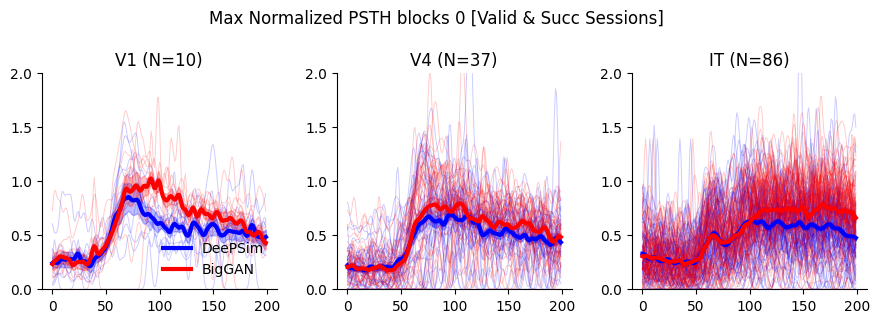

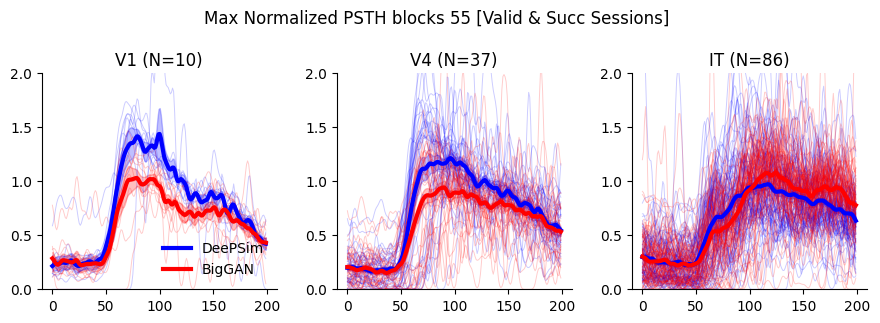

In [69]:
commonmsk, fnamestr, titlestr = validmsk & sucsmsk, "val_succ", "Valid & Succ"
for block in [0, max_len-1]:
    figh, axs = plt.subplots(1, 3, figsize=(9, 3.25), squeeze=False)
    rowi = 0
    for colj, (msk_minor, lable_minor) in enumerate(zip([V1msk, V4msk, ITmsk],
                                                        ["V1", "V4", "IT"])):
        msk = msk_minor & commonmsk
        axs[rowi, colj].plot(norm_psth_extrap_arr[msk, block, 0, :].T, color="blue", alpha=0.2, lw=0.7, label=None)
        axs[rowi, colj].plot(norm_psth_extrap_arr[msk, block, 1, :].T, color="red", alpha=0.2, lw=0.7, label=None)
        mean_psth_FC = norm_psth_extrap_arr[msk, block, 0, :].mean(axis=0)
        sem_psth_FC = norm_psth_extrap_arr[msk, block, 0, :].std(axis=0) / np.sqrt(msk.sum())
        mean_psth_BG = norm_psth_extrap_arr[msk, block, 1, :].mean(axis=0)
        sem_psth_BG =norm_psth_extrap_arr[msk, block, 1, :].std(axis=0) / np.sqrt(msk.sum())
        axs[rowi, colj].plot(mean_psth_FC, color="blue", lw=3, label="DeePSim")
        axs[rowi, colj].fill_between(np.arange(len(mean_psth_FC)),
                                        mean_psth_FC-sem_psth_FC,
                                        mean_psth_FC+sem_psth_FC,
                                        color="blue", alpha=0.25, label=None)
        axs[rowi, colj].plot(mean_psth_BG, color="red", lw=3, label="BigGAN")
        axs[rowi, colj].fill_between(np.arange(len(mean_psth_BG)),
                                        mean_psth_BG-sem_psth_BG,
                                        mean_psth_BG+sem_psth_BG,
                                        color="red", alpha=0.25, label=None)
        axs[rowi, colj].set_title(f"{lable_minor} (N={msk.sum()})")

    for ax in axs.ravel():
        # ax.set_xlim([0, 40])
        ax.set_ylim([0, 2.0])

    axs[0, 0].legend(loc="lower right", frameon=False)
    plt.suptitle(f"Max Normalized PSTH blocks {block} [{titlestr} Sessions]")
    plt.tight_layout()
    # saveallforms([figdir], f"maxnorm_psth_traj_{fnamestr}_area_both_block{block:02d}", figh=figh)
    plt.show()

In [70]:
for block in [0, max_len-1]:
    for slice_i, slice_name in enumerate(["DeePSim_mean", "BigGAN_mean"]):
        data = norm_psth_extrap_arr[:, block, slice_i, :]
        df = pd.DataFrame(data)
        df.to_csv(join(source_data_dir, 
            f"Figure5A_src_all_exps_maxnorm_mean_psth_per_block{block:02d}_{slice_name}.csv"), 
            index=False)
        

In [82]:
def plot_maxnorm_psth_per_block(norm_psth_extrap_arr_per_block, block, commonmsk=True, titlestr="", 
                                mask_col=[V1msk, V4msk, ITmsk], mask_labels=["V1", "V4", "IT"]):
    figh, axs = plt.subplots(1, 3, figsize=(9, 3.25), squeeze=False)
    rowi = 0
    for colj, (msk_minor, lable_minor) in enumerate(zip(mask_col, mask_labels)):
        msk = msk_minor & commonmsk
        axs[rowi, colj].plot(norm_psth_extrap_arr_per_block[msk, 0, :].T, color="blue", alpha=0.2, lw=0.7, label=None)
        axs[rowi, colj].plot(norm_psth_extrap_arr_per_block[msk, 1, :].T, color="red", alpha=0.2, lw=0.7, label=None)
        mean_psth_FC = norm_psth_extrap_arr_per_block[msk, 0, :].mean(axis=0)
        sem_psth_FC = norm_psth_extrap_arr_per_block[msk, 0, :].std(axis=0) / np.sqrt(msk.sum())
        mean_psth_BG = norm_psth_extrap_arr_per_block[msk, 1, :].mean(axis=0)
        sem_psth_BG =norm_psth_extrap_arr_per_block[msk, 1, :].std(axis=0) / np.sqrt(msk.sum())
        axs[rowi, colj].plot(mean_psth_FC, color="blue", lw=3, label="DeePSim")
        axs[rowi, colj].fill_between(np.arange(len(mean_psth_FC)),
                                        mean_psth_FC-sem_psth_FC,
                                        mean_psth_FC+sem_psth_FC,
                                        color="blue", alpha=0.25, label=None)
        axs[rowi, colj].plot(mean_psth_BG, color="red", lw=3, label="BigGAN")
        axs[rowi, colj].fill_between(np.arange(len(mean_psth_BG)),
                                        mean_psth_BG-sem_psth_BG,
                                        mean_psth_BG+sem_psth_BG,
                                        color="red", alpha=0.25, label=None)
        axs[rowi, colj].set_title(f"{lable_minor} (N={msk.sum()})")

    for ax in axs.ravel():
        # ax.set_xlim([0, 40])
        ax.set_ylim([0, 2.0])

    axs[0, 0].legend(loc="lower right", frameon=False)
    plt.suptitle(f"Max Normalized PSTH blocks {block} [{titlestr} Sessions]")
    plt.tight_layout()
    # saveallforms([figdir], f"maxnorm_psth_traj_{fnamestr}_area_both_block{block:02d}", figh=figh)
    plt.show()
    return figh

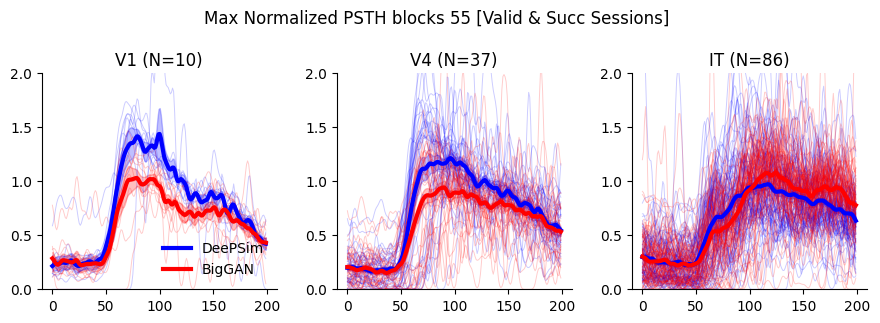

In [ ]:
commonmsk, fnamestr, titlestr = validmsk & sucsmsk, "val_succ", "Valid & Succ"
figh = plot_maxnorm_psth_per_block(norm_psth_extrap_arr[:, 55, :, :], 55, commonmsk=commonmsk, 
                                   titlestr=titlestr, mask_col=[V1msk, V4msk, ITmsk], mask_labels=["V1", "V4", "IT"])

In [87]:
mask_df

,valid,V1msk,V4msk,ITmsk,FCsucc005,BGsucc005,bothsucc005,nonesucc005,anysucc005,FCsucc001,BGsucc001,bothsucc001,nonesucc001,anysucc001
0,1,0,0,1,1,1,1,0,1,1,1,1,0,1
1,0,0,0,1,1,1,1,0,1,1,1,1,0,1
2,1,0,0,1,1,1,1,0,1,1,1,1,0,1
3,1,0,0,1,1,1,1,0,1,1,1,1,0,1
4,1,0,0,1,1,1,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,0,0,1,1,1,1,0,1,1,1,1,0,1
166,1,1,0,0,1,0,0,0,1,1,0,0,0,1
167,1,1,0,0,1,1,1,0,1,1,0,0,0,1
168,1,1,0,0,1,0,0,0,1,1,0,0,0,1


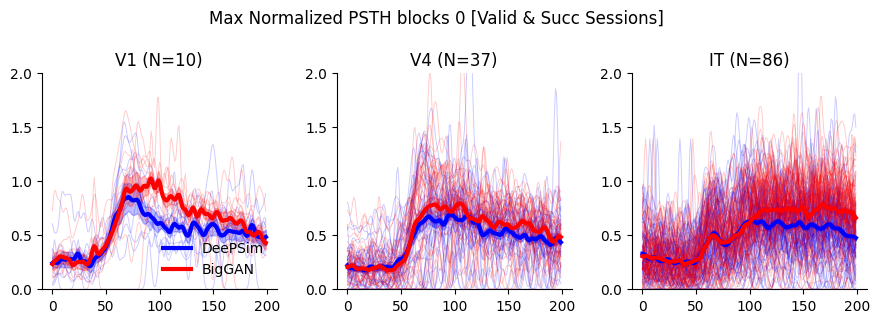

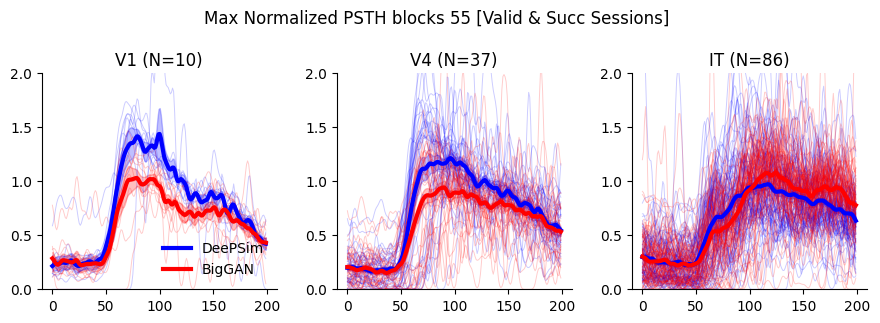

In [ ]:
def load_norm_psth_extrap_arr_block(block, slice_names=["DeePSim_mean", "BigGAN_mean"]):
    arrs = [
        pd.read_csv(
            join(source_data_dir,f"Figure5A_src_all_exps_maxnorm_mean_psth_per_block{block:02d}_{slice_name}.csv")
        ).values
        for slice_name in slice_names
    ]
    return np.stack(arrs, axis=1)

mask_df = pd.read_csv(join(source_data_dir, "Figure5_src_exp_masks_and_succ_labels.csv"))

V1msk = mask_df["V1msk"].values.astype(bool)
V4msk = mask_df["V4msk"].values.astype(bool)
ITmsk = mask_df["ITmsk"].values.astype(bool)
validmsk = mask_df["valid"].values.astype(bool)
sucsmsk = mask_df["anysucc005"].values.astype(bool)

commonmsk, fnamestr, titlestr = validmsk & sucsmsk, "val_succ", "Valid & Succ"
norm_psth_extrap_arr_block0 = load_norm_psth_extrap_arr_block(0)
norm_psth_extrap_arr_block55 = load_norm_psth_extrap_arr_block(55)
figh = plot_maxnorm_psth_per_block(norm_psth_extrap_arr_block0, 0, commonmsk=commonmsk, 
                                   titlestr=titlestr, mask_col=[V1msk, V4msk, ITmsk], mask_labels=["V1", "V4", "IT"])
figh = plot_maxnorm_psth_per_block(norm_psth_extrap_arr_block55, 55, commonmsk=commonmsk, 
                                   titlestr=titlestr, mask_col=[V1msk, V4msk, ITmsk], mask_labels=["V1", "V4", "IT"])

### Figure 5C

In [3]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
def plot_normalized_response_trajectories(rsp_wdws, resp_col_multi_wdw, full_normalizer, area_masks, area_labels,
                                          commonmsk, signif_test=False, signif_alpha=0.05, plot_individual_exp=True,
                                          mcc_corrections=["nomcc", "fdr", "bonf"]):

    figh, axs = plt.subplots(len(area_masks), len(rsp_wdws), figsize=(3 * len(rsp_wdws), 3 * len(area_masks) + .5), sharey="row", )
    for colj, rsp_wdw in enumerate(rsp_wdws):
        # resp_col, _ = extract_all_evol_trajectory_dyna(BFEStats, rsp_wdw=rsp_wdw)
        resp_col = resp_col_multi_wdw[colj]
        resp_extrap_arr, extrap_mask_arr, max_len = pad_resp_traj(resp_col)
        normresp_extrap_arr_univ = resp_extrap_arr / full_normalizer
        for rowi, (msk_major, label_major) in enumerate(zip(area_masks, area_labels)):
            msk = msk_major & commonmsk
            if plot_individual_exp:
                axs[rowi, colj].plot(normresp_extrap_arr_univ[msk, :, 0].T, color="blue", alpha=0.2, lw=0.7, label=None)
                axs[rowi, colj].plot(normresp_extrap_arr_univ[msk, :, 1].T, color="red", alpha=0.2, lw=0.7, label=None)
            
            mean_trace_FC = normresp_extrap_arr_univ[msk, :, 0].mean(axis=0)
            sem_trace_FC = normresp_extrap_arr_univ[msk, :, 0].std(axis=0) / np.sqrt(msk.sum())
            mean_trace_BG = normresp_extrap_arr_univ[msk, :, 1].mean(axis=0)
            sem_trace_BG = normresp_extrap_arr_univ[msk, :, 1].std(axis=0) / np.sqrt(msk.sum())
            axs[rowi, colj].plot(mean_trace_FC, color="blue", lw=3, label="DeePSim")
            axs[rowi, colj].fill_between(np.arange(len(mean_trace_FC)),
                                         mean_trace_FC - sem_trace_FC,
                                         mean_trace_FC + sem_trace_FC,
                                         color="blue", alpha=0.25, label=None)
            axs[rowi, colj].plot(mean_trace_BG, color="red", lw=3, label="BigGAN")
            axs[rowi, colj].fill_between(np.arange(len(mean_trace_BG)),
                                         mean_trace_BG - sem_trace_BG,
                                         mean_trace_BG + sem_trace_BG,
                                         color="red", alpha=0.25, label=None)
            axs[rowi, colj].set_title(f"[{rsp_wdw[0]}, {rsp_wdw[-1] + 1}ms]")
            if colj == 0:
                axs[rowi, 0].set_ylabel(f"Max Normalized Response\n{label_major} (N={msk.sum()})")
            
            if signif_test:
                # We'll do a two-sample t-test at each time point comparing FC vs BG
                FC_arr = normresp_extrap_arr_univ[msk, :, 0]  # shape: (num_units, time)
                BG_arr = normresp_extrap_arr_univ[msk, :, 1]  # shape: (num_units, time)

                pvals = []
                tstat_signs = []  # Store which value is larger
                for t in range(FC_arr.shape[1]):
                    # paired t test
                    tstat, p = stats.ttest_rel(FC_arr[:, t], BG_arr[:, t])
                    pvals.append(p)
                    tstat_signs.append(tstat > 0)  # True if FC > BG
                pvals = np.array(pvals)
                tstat_signs = np.array(tstat_signs)
                sig_mask_nomcc = pvals < signif_alpha
                # Multiple comparison correction
                # FDR correction
                alpha = signif_alpha  # significance threshold
                reject, pvals_fdr, _, _ = multipletests(pvals, alpha=alpha, method='fdr_bh')
                sig_mask_fdr = reject  # Boolean array: True if significant at alpha
                # Bonferroni correction 
                pvals_bonf = pvals * len(pvals)  # Multiply by number of comparisons
                sig_mask_bonf = pvals_bonf < signif_alpha

                # Plot both FDR and Bonferroni significant points at different heights
                for mcc_correction in mcc_corrections:
                    if mcc_correction == "nomcc":
                        # Split into FC>BG and BG>FC points
                        fc_higher = sig_mask_nomcc & tstat_signs
                        bg_higher = sig_mask_nomcc & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.3,
                                    'b.', markersize=4,
                                    label=f'p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.3,
                                    'r.', markersize=4,
                                    label=None)
                    elif mcc_correction == "fdr":
                        fc_higher = sig_mask_fdr & tstat_signs
                        bg_higher = sig_mask_fdr & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.35,
                                    'b.', markersize=4,
                                    label=f'FDR p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.35,
                                    'r.', markersize=4,
                                    label=None)
                    elif mcc_correction == "bonf":
                        fc_higher = sig_mask_bonf & tstat_signs
                        bg_higher = sig_mask_bonf & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.40,
                                    'b.', markersize=4,
                                    label=f'Bonf p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.40,
                                    'r.', markersize=4,
                                    label=None)

    for ax in axs.ravel():
        ax.set_xlim([-0.5, 45.5])
        ax.set_ylim([0, 1.5])

    axs[0, 0].legend(loc="upper right", frameon=False)
    plt.show()
    return figh

In [43]:
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
def pad_normalize_multi_wdw_resp_trajs(rsp_wdws, resp_col_multi_wdw, full_normalizer, ):
    normresp_extrap_arr_univ_col = {}
    for colj, rsp_wdw in enumerate(rsp_wdws):
        # resp_col, _ = extract_all_evol_trajectory_dyna(BFEStats, rsp_wdw=rsp_wdw)
        resp_col = resp_col_multi_wdw[colj]
        resp_extrap_arr, extrap_mask_arr, max_len = pad_resp_traj(resp_col)
        normresp_extrap_arr_univ = resp_extrap_arr / full_normalizer
        normresp_extrap_arr_univ_col[rsp_wdw] = normresp_extrap_arr_univ
    return normresp_extrap_arr_univ_col


def plot_normalized_response_trajectories_from_precomputed_normresp(normresp_extrap_arr_univ_col, area_masks, area_labels,
                                          commonmsk, signif_test=False, signif_alpha=0.05, plot_individual_exp=True,
                                          mcc_corrections=["nomcc", "fdr", "bonf"],
                                          panel_width=3, panel_height=3):

    figh, axs = plt.subplots(len(area_masks), len(rsp_wdws), figsize=(panel_width * len(rsp_wdws), panel_height * len(area_masks) + .5), sharey="row", )
    for colj, (rsp_wdw, normresp_extrap_arr_univ) in enumerate(normresp_extrap_arr_univ_col.items()):
        for rowi, (msk_major, label_major) in enumerate(zip(area_masks, area_labels)):
            msk = msk_major & commonmsk
            if plot_individual_exp:
                axs[rowi, colj].plot(normresp_extrap_arr_univ[msk, :, 0].T, color="blue", alpha=0.2, lw=0.7, label=None)
                axs[rowi, colj].plot(normresp_extrap_arr_univ[msk, :, 1].T, color="red", alpha=0.2, lw=0.7, label=None)
            
            mean_trace_FC = normresp_extrap_arr_univ[msk, :, 0].mean(axis=0)
            sem_trace_FC = normresp_extrap_arr_univ[msk, :, 0].std(axis=0) / np.sqrt(msk.sum())
            mean_trace_BG = normresp_extrap_arr_univ[msk, :, 1].mean(axis=0)
            sem_trace_BG = normresp_extrap_arr_univ[msk, :, 1].std(axis=0) / np.sqrt(msk.sum())
            axs[rowi, colj].plot(mean_trace_FC, color="blue", lw=3, label="DeePSim")
            axs[rowi, colj].fill_between(np.arange(len(mean_trace_FC)),
                                         mean_trace_FC - sem_trace_FC,
                                         mean_trace_FC + sem_trace_FC,
                                         color="blue", alpha=0.25, label=None)
            axs[rowi, colj].plot(mean_trace_BG, color="red", lw=3, label="BigGAN")
            axs[rowi, colj].fill_between(np.arange(len(mean_trace_BG)),
                                         mean_trace_BG - sem_trace_BG,
                                         mean_trace_BG + sem_trace_BG,
                                         color="red", alpha=0.25, label=None)
            axs[rowi, colj].set_title(f"[{rsp_wdw[0]}, {rsp_wdw[-1] + 1}ms]")
            if colj == 0:
                axs[rowi, 0].set_ylabel(f"Max Normalized Response\n{label_major} (N={msk.sum()})")
            
            if signif_test:
                # We'll do a two-sample t-test at each time point comparing FC vs BG
                FC_arr = normresp_extrap_arr_univ[msk, :, 0]  # shape: (num_units, time)
                BG_arr = normresp_extrap_arr_univ[msk, :, 1]  # shape: (num_units, time)

                pvals = []
                tstat_signs = []  # Store which value is larger
                for t in range(FC_arr.shape[1]):
                    # paired t test
                    tstat, p = stats.ttest_rel(FC_arr[:, t], BG_arr[:, t])
                    pvals.append(p)
                    tstat_signs.append(tstat > 0)  # True if FC > BG
                pvals = np.array(pvals)
                tstat_signs = np.array(tstat_signs)
                sig_mask_nomcc = pvals < signif_alpha
                # Multiple comparison correction
                # FDR correction
                alpha = signif_alpha  # significance threshold
                reject, pvals_fdr, _, _ = multipletests(pvals, alpha=alpha, method='fdr_bh')
                sig_mask_fdr = reject  # Boolean array: True if significant at alpha
                # Bonferroni correction 
                pvals_bonf = pvals * len(pvals)  # Multiply by number of comparisons
                sig_mask_bonf = pvals_bonf < signif_alpha

                # Plot both FDR and Bonferroni significant points at different heights
                for mcc_correction in mcc_corrections:
                    if mcc_correction == "nomcc":
                        # Split into FC>BG and BG>FC points
                        fc_higher = sig_mask_nomcc & tstat_signs
                        bg_higher = sig_mask_nomcc & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.3,
                                    'b.', markersize=4,
                                    label=f'p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.3,
                                    'r.', markersize=4,
                                    label=None)
                    elif mcc_correction == "fdr":
                        fc_higher = sig_mask_fdr & tstat_signs
                        bg_higher = sig_mask_fdr & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.35,
                                    'b.', markersize=4,
                                    label=f'FDR p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.35,
                                    'r.', markersize=4,
                                    label=None)
                    elif mcc_correction == "bonf":
                        fc_higher = sig_mask_bonf & tstat_signs
                        bg_higher = sig_mask_bonf & ~tstat_signs
                        axs[rowi, colj].plot(np.where(fc_higher)[0],
                                    np.ones(np.sum(fc_higher))*1.40,
                                    'b.', markersize=4,
                                    label=f'Bonf p<{signif_alpha}' if colj==0 and rowi==0 else "")
                        axs[rowi, colj].plot(np.where(bg_higher)[0],
                                    np.ones(np.sum(bg_higher))*1.40,
                                    'r.', markersize=4,
                                    label=None)

    for ax in axs.ravel():
        ax.set_xlim([-0.5, 45.5])
        ax.set_ylim([0, 1.5])

    axs[0, 0].legend(loc="upper right", frameon=False)
    plt.show()
    return figh

In [ ]:
from neuro_data_analysis.neural_data_lib import extract_all_evol_trajectory_dyna, \
    pad_resp_traj, extract_all_evol_trajectory_dyna_multiwindow_nostats

In [18]:
# tabdir = r"E:\OneDrive - Harvard University\Manuscript_BigGAN\Stats_tables"
tabdir = r'/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_BigGAN/Stats_tables'
meta_df = pd.read_csv(join(tabdir, "meta_stats_w_optimizer.csv"), index_col=False)
Amsk, Bmsk, V1msk, V4msk, ITmsk, \
    length_msk, spc_msk, sucsmsk, \
    bsl_unstable_msk, bsl_stable_msk, validmsk = get_all_masks(meta_df)

total number of experiments: 170
total number of valid experiments: 154
total number of valid experiments with suc: 133
Exluded:
  - short: 8
  - unstable baseline: 6
  - not fc6-BigGAN: 3


In [19]:
p_thresh = 0.05
FCsucsmsk = meta_df.p_maxinit_0 < p_thresh
BGsucsmsk = meta_df.p_maxinit_1 < p_thresh
bothsucsmsk = FCsucsmsk & BGsucsmsk
nonesucsmsk = (~FCsucsmsk) & (~BGsucsmsk)
anysucsmsk = FCsucsmsk | BGsucsmsk
mask_df = pd.DataFrame({
    "valid": validmsk.astype(int),
    "V1msk": V1msk.astype(int),
    "V4msk": V4msk.astype(int),
    "ITmsk": ITmsk.astype(int),
    "FCsucc005": FCsucsmsk.astype(int),
    "BGsucc005": BGsucsmsk.astype(int),
    "bothsucc005": bothsucsmsk.astype(int),
    "nonesucc005": nonesucsmsk.astype(int),
    "anysucc005": anysucsmsk.astype(int),
})
p_thresh = 0.01
FCsucsmsk = meta_df.p_maxinit_0 < p_thresh
BGsucsmsk = meta_df.p_maxinit_1 < p_thresh
bothsucsmsk = FCsucsmsk & BGsucsmsk
nonesucsmsk = (~FCsucsmsk) & (~BGsucsmsk)
anysucsmsk = FCsucsmsk | BGsucsmsk
mask_df["FCsucc001"] = FCsucsmsk.astype(int)
mask_df["BGsucc001"] = BGsucsmsk.astype(int)
mask_df["bothsucc001"] = bothsucsmsk.astype(int)
mask_df["nonesucc001"] = nonesucsmsk.astype(int)
mask_df["anysucc001"] = anysucsmsk.astype(int)
mask_df.to_csv(join(source_data_dir, f"Figure5_src_exp_masks_and_succ_labels.csv"), index=False)

In [5]:
BFEStats_merge, BFEStats = load_neural_data()

Exp 003 Beto-22072020-002 Pref chan5 U2
image size [3. 3.] deg  pos [-0.7  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 004 Beto-22072020-003 Pref chan5 U2
image size [6. 6.] deg  pos [-0.7  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN_class
Exp 005 Beto-23072020-002 Pref chan29 U2
image size [3. 3.] deg  pos [-0.8  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 006 Beto-27072020-002 Pref chan26 U1
image size [3. 3.] deg  pos [-1.1  0. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 007 Beto-28072020-003 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN
Exp 008 Beto-28072020-006 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN
Exp 009 Beto-29072020-002 Pref chan28 U1
image size [3. 3.] deg  pos [0.  0.5]
Evol thr0: fc6   thr1: BigGAN_class
Exp 010 Beto-29072020-003 Pref chan18 U1
image size [4. 4.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 012 Beto-31072020-003 Pref chan29 U2
image size [3. 3.] de

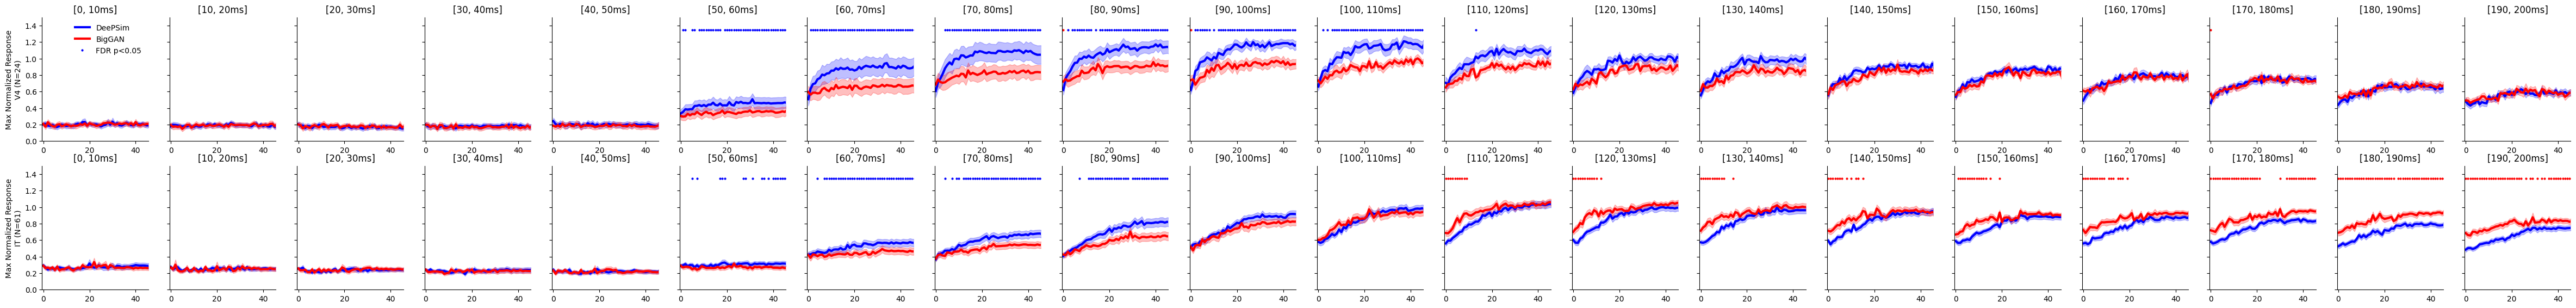

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_65893/4202962249.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figh.show()


In [ ]:
resp_col, meta_df = extract_all_evol_trajectory_dyna(BFEStats, rsp_wdw=range(50, 200))
resp_extrap_arr, extrap_mask_arr, max_len = pad_resp_traj(resp_col)
full_normalizer = resp_extrap_arr[:, :, 0:2].max(axis=(1, 2), keepdims=True)
# for wdw_col_str, rsp_wdws in window_configs:
# for window_length  in (10, 20, 25, 50):
bothsucsmsk = mask_df["bothsucc005"].values.astype(bool)
window_length = 10
wdw_col_str = f"{window_length}ms_wdw"
rsp_wdws = [range(i*window_length, (i+1)*window_length) for i in range(200//window_length)]
resp_col_multi_wdw, _ = extract_all_evol_trajectory_dyna_multiwindow_nostats(BFEStats, rsp_wdws=rsp_wdws)
# for commonmsk, commonmsk_title_str, commonmsk_str in [(validmsk & bothsucsmsk, "Valid & Both Success",  "valid_bothsucc"),
#                                                     (validmsk & sucsmsk, "Valid & Any Success", "valid_succ"),
#                                                     (validmsk, "Valid", "valid"),
#                                                     ]:
commonmsk, commonmsk_title_str, commonmsk_str = (validmsk & bothsucsmsk, "Valid & Both Success",  "valid_bothsucc")
figh = plot_normalized_response_trajectories(rsp_wdws, resp_col_multi_wdw, full_normalizer, 
                        [V4msk, ITmsk], ["V4", "IT"], 
                        commonmsk, signif_alpha=0.05, signif_test=True, 
                        plot_individual_exp=False, mcc_corrections=["fdr"])
figh.suptitle(
    f"Universal Max Normalized response {wdw_col_str} across blocks [{commonmsk_title_str} Sessions]")
figh.tight_layout()
# saveallforms([outdir, figdir], f"univmaxnorm_resp_traj_{commonmsk_str}_area_sep_{wdw_col_str}_synopsis_annot_sigif_mcc_fdr_V4IT", figh=figh)
figh.show()

In [ ]:
resp_col, meta_df = extract_all_evol_trajectory_dyna(BFEStats, rsp_wdw=range(50, 200))
resp_extrap_arr, extrap_mask_arr, max_len = pad_resp_traj(resp_col)
full_normalizer = resp_extrap_arr[:, :, 0:2].max(axis=(1, 2), keepdims=True)
bothsucsmsk = mask_df["bothsucc005"].values.astype(bool)
window_length = 10
wdw_col_str = f"{window_length}ms_wdw"
rsp_wdws = [range(i*window_length, (i+1)*window_length) for i in range(200//window_length)]
resp_col_multi_wdw, _ = extract_all_evol_trajectory_dyna_multiwindow_nostats(BFEStats, rsp_wdws=rsp_wdws)

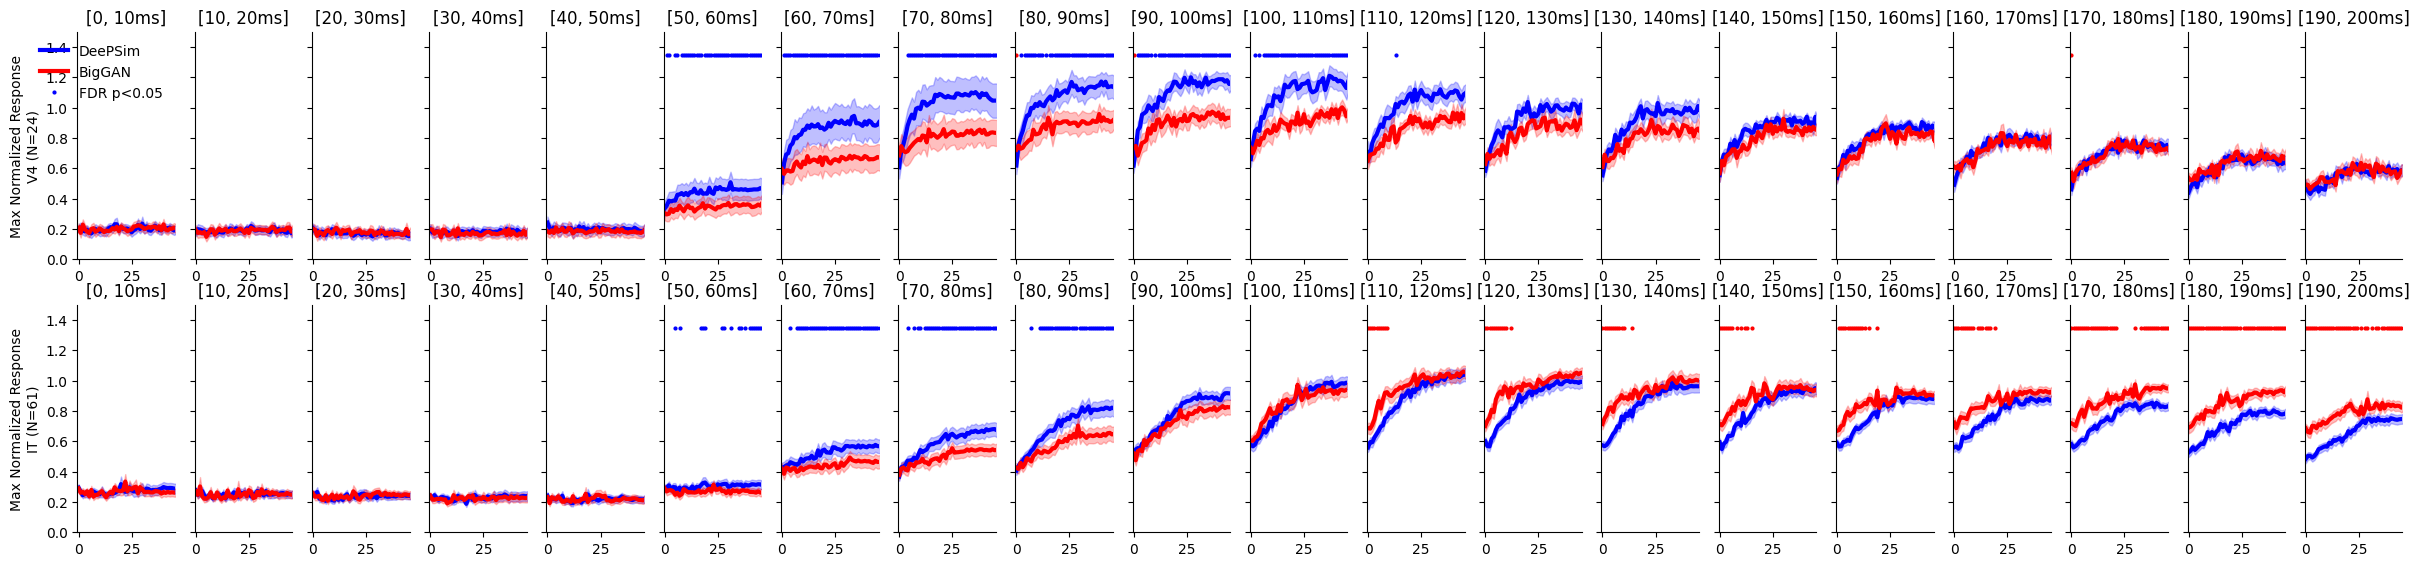

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_65893/639808091.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figh.show()


In [ ]:
bothsucsmsk = mask_df["bothsucc005"].values.astype(bool)
commonmsk, commonmsk_title_str, commonmsk_str = (validmsk & bothsucsmsk, "Valid & Both Success",  "valid_bothsucc")
normresp_extrap_arr_univ_col = pad_normalize_multi_wdw_resp_trajs(rsp_wdws, resp_col_multi_wdw, full_normalizer, )
plot_normalized_response_trajectories_from_precomputed_normresp(normresp_extrap_arr_univ_col, 
                            [V4msk, ITmsk], ["V4", "IT"], 
                            commonmsk, signif_alpha=0.05, signif_test=True, 
                            plot_individual_exp=False, mcc_corrections=["fdr"],
                            panel_width=1.5, panel_height=3)
figh.suptitle(
    f"Universal Max Normalized response {wdw_col_str} across blocks [{commonmsk_title_str} Sessions]")
figh.tight_layout()
figh.show()

In [65]:
slice_names = ["DeePSim_mean", "BigGAN_mean", "DeePSim_sem", "BigGAN_sem"]
for i, (rsp_wdw, normresp_extrap_arr_univ) in \
    enumerate(normresp_extrap_arr_univ_col.items()):
    for j, slice_name in enumerate(slice_names):  # save slices 0,1,2,3
        savepath = join(source_data_dir, f"Figure5C_src_normresp_wdw_{rsp_wdw.start}-{rsp_wdw.stop}_{slice_name}.csv")
        df = pd.DataFrame(normresp_extrap_arr_univ[:, :, j])
        df.to_csv(savepath, index=False)

#### Test loading and plotting 

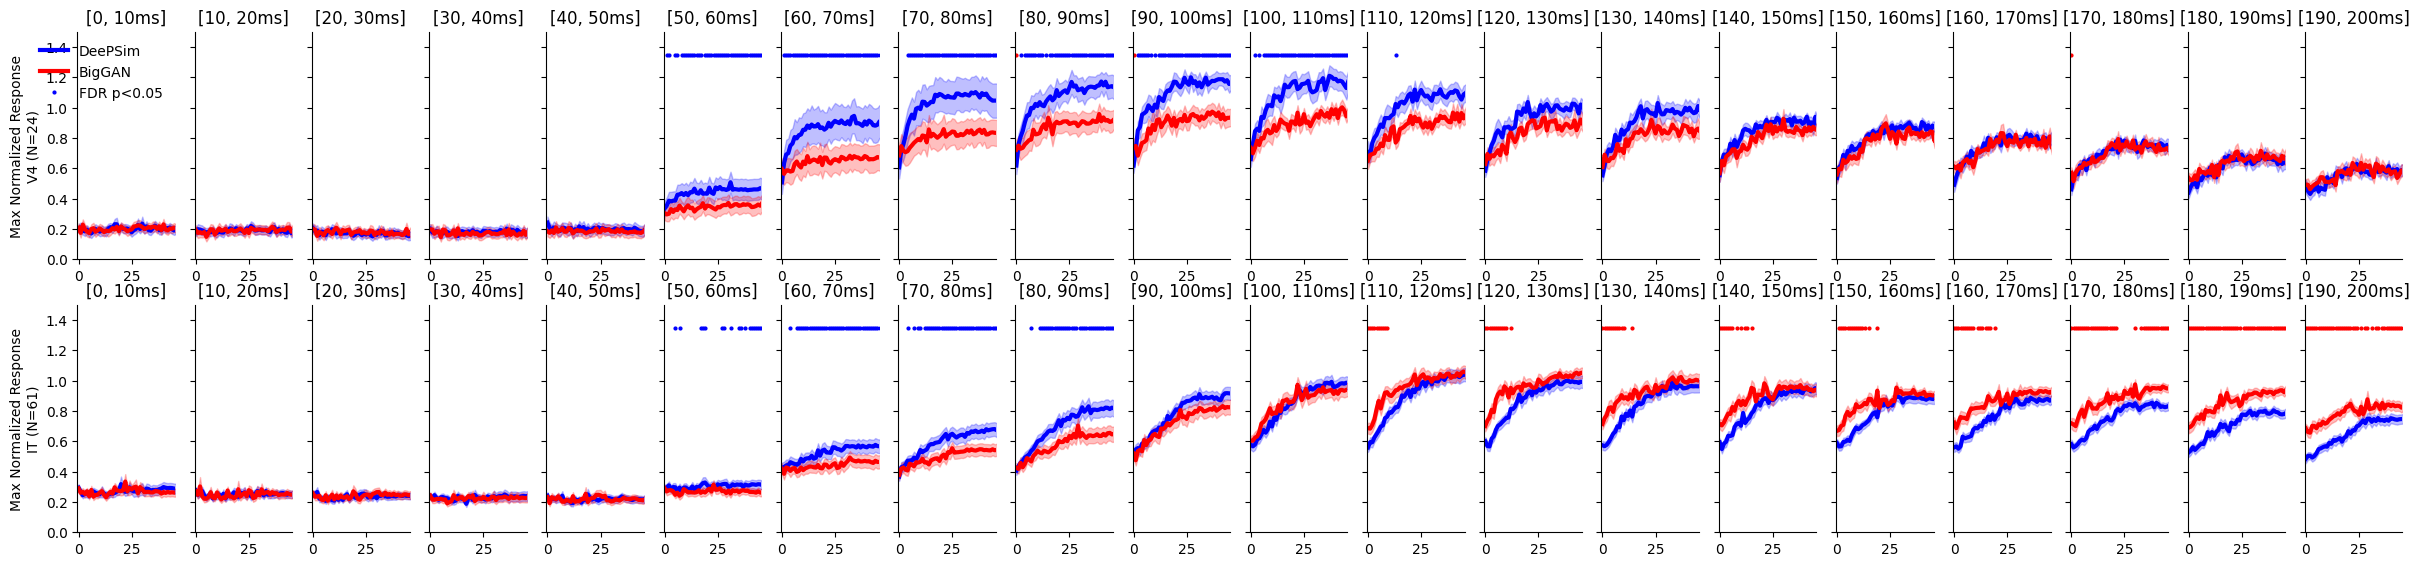

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_65893/1491063929.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figh.show()


In [66]:
window_length = 10
rsp_wdws = [range(i*window_length, (i+1)*window_length) for i in range(200//window_length)]
# reconstruct normresp_extrap_arr_univ_col from the saved csv files
normresp_extrap_arr_univ_col = {}
for rsp_wdw in rsp_wdws:
    slices = []
    for slice_name in slice_names:
        savepath = join(source_data_dir, f"Figure5C_src_normresp_wdw_{rsp_wdw.start}-{rsp_wdw.stop}_{slice_name}.csv")
        df = pd.read_csv(savepath)
        slices.append(df.values)
    # Stack along the last axis and store in the dict
    normresp_extrap_arr_univ_col[rsp_wdw] = np.stack(slices, axis=-1)

bothsucsmsk = mask_df["bothsucc005"].values.astype(bool)
commonmsk, commonmsk_title_str, commonmsk_str = (validmsk & bothsucsmsk, "Valid & Both Success",  "valid_bothsucc")
normresp_extrap_arr_univ_col = pad_normalize_multi_wdw_resp_trajs(rsp_wdws, resp_col_multi_wdw, full_normalizer, )
plot_normalized_response_trajectories_from_precomputed_normresp(normresp_extrap_arr_univ_col, 
                            [V4msk, ITmsk], ["V4", "IT"], 
                            commonmsk, signif_alpha=0.05, signif_test=True, 
                            plot_individual_exp=False, mcc_corrections=["fdr"],
                            panel_width=1.5, panel_height=3)
figh.suptitle(
    f"Universal Max Normalized response {wdw_col_str} across blocks [{commonmsk_title_str} Sessions]")
figh.tight_layout()
figh.show()